In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_548/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# IEEE-CIS Fraud Detection

#### BY : Kai Jin  

#### Student ID : 22011493

## Table of Contents
1. **Introduction**
   1. Datasets used
   2. Dataset sources
2. **Executive Summary**
   1. Load and analyse data
   2. Data integration and analysis
   3. Data cleansing
   4. Feature Screening
   5. Building the model
3. **Conclusion**
4. **Bibliography**

# Introduction
Although fraud prevention can be cumbersome, fraud prevention systems can save consumers millions of dollars each year by preventing them from losing money due to fraud and thus using them to protect their assets from fraud. Thus, this experiment attempts to improve the accuracy of fraud prevention systems by reducing the cumbersome user experience through more accurate fraud detection and more accurate determination of whether a transaction is fraudulent. Knn model, NAÏVE BAYES model, Cluster analysis model, and Random Forest model are used to determine the usefulness and accuracy of these models in this experiment.

#### Datasets used
1. /kaggle/input/ieee-fraud-detection/test_identity.csv
2. /kaggle/input/ieee-fraud-detection/test_transaction.csv
3. /kaggle/input/ieee-fraud-detection/train_identity.csv
4. /kaggle/input/ieee-fraud-detection/train_transaction.csv

#### Dataset sources
/kaggle/input/ieee-fraud-detection

### Executive Summary

##### Import tool configuration
Import the required extension libraries, plotting tools, and datasets into the jupyter notebook, and perform exploratory data analysis (EDA) on the key questions raised by going through data cleaning, filtering, and plotting the data in the dataset.(The python version used is 3.11.2)

In [2]:
%%time
import numpy as np 
import pandas as pd 
import requests                 
import matplotlib.pyplot as plt
import json
import statsmodels.api as sm
import urllib
import urllib.request
import matplotlib as mpl
import seaborn as sns
import patsy
import plotly
import sys
import plotly.graph_objects as go
import plotly_express as px
import statsmodels.formula.api as smf
import os
import csv
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from unicodedata import normalize
from bs4 import BeautifulSoup
from time import sleep
from datetime import datetime   
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 1.6 s, sys: 358 ms, total: 1.96 s
Wall time: 1.61 s


By preparing large data sets for later encounters, this method saves a lot of memory space and speeds up data processing.

In [3]:
%%time
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.4 µs


#### Load and analyse data


##### Loading data and performing basic analysis
Importing the required data and analysing the basic information from the two training tables
(train_transaction & train_identity)

In [4]:
%%time
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

CPU times: user 53 s, sys: 12.7 s, total: 1min 5s
Wall time: 1min 5s


In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

Visual analysis of the number of cases between fraudulent and non-fraudulent payments and the percentage between them using histograms and pie charts.

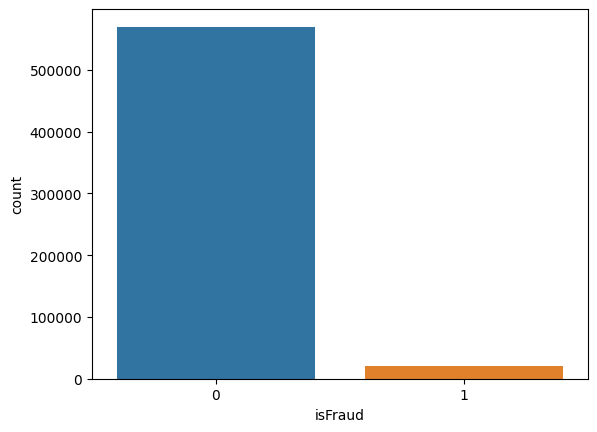

In [9]:
sns.countplot(x=train_transaction["isFraud"]);
plt.show()

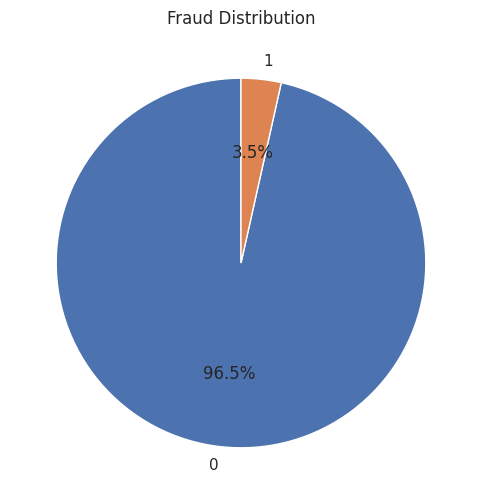

In [10]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

fraud_counts = train_transaction["isFraud"].value_counts()

plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Fraud Distribution")

plt.show()

As can be seen from the above graph, there is a significant difference in the number of fraudulent and non-fraudulent payment cases, with non-fraudulent payment cases being much higher than fraudulent payment cases. Because of the significant difference between the sample sizes, subsequent data sampling is required to ensure a balanced sample size for both data types.

#### Data integration and analysis

In [11]:
%%time
train_df = train_transaction.merge(train_identity, how="left", on="TransactionID")
del train_transaction, train_identity
train_df.shape

CPU times: user 1.4 s, sys: 652 ms, total: 2.05 s
Wall time: 2 s


(590540, 434)

In [12]:
%%time
test_df = test_transaction.merge(test_identity, how="left", on="TransactionID")
del test_transaction, test_identity
test_df.shape

CPU times: user 1.19 s, sys: 641 ms, total: 1.83 s
Wall time: 1.82 s


(506691, 433)

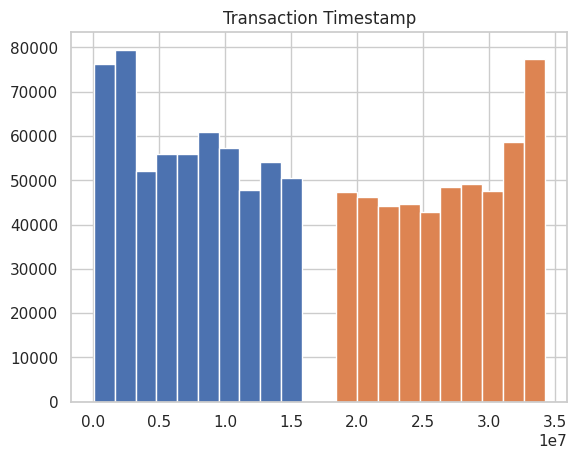

In [13]:
plt.hist(train_df['TransactionDT'], label='Train')
plt.hist(test_df['TransactionDT'], label='Test')
plt.title('Transaction Timestamp')
plt.show()


The above will train_transaction and train_identity merged into train_df, test_transaction, and test_identity merged into test_df, and delete the data set before merging to free up memory space. The above histogram can be seen in the training data train_df time is before the test data test_df; there is a time gap between the two, but also to do this step is to prevent confusion between the two lists of the time, and thus affect the subsequent experiments.

#### Data cleansing

##### Narrowing the range of features
The feature is considered meaningless if there are too many missing values in a data column. The list of features with more than 20 percent missing values is removed, thus narrowing the range of features selected.

In [14]:
mv1 = train_df.isnull().sum()/len(train_df)
train_df = train_df.drop(columns=mv1[mv1>0.2].index)

mv2 = test_df.isnull().sum()/len(test_df)
test_df = test_df.drop(columns=mv2[mv2>0.2].index)

print(train_df.shape)
print(test_df.shape)


(590540, 182)
(506691, 200)


##### Dealing with data set redundancy
By calling the reduce_mem_usage function, reduce the amount of memory used by train_df and test_df, thus saving memory space and improving the efficiency of code execution.

In [15]:
%%time
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to 244.98 Mb (70.3% reduction)
Mem. usage decreased to 231.94 Mb (70.1% reduction)
CPU times: user 33.7 s, sys: 30.6 s, total: 1min 4s
Wall time: 1min 4s


##### Changing dataset indexes
Set indexes on the train_df and test_df tables, set the index value to the "TransactionID" column, and apply the operation to the original DataFrame object. It can be based on the "TransactionID" for fast data search and operation to be more convenient for subsequent data analysis and processing.

In [16]:
%%time
train_df.set_index('TransactionID', inplace=True) 
test_df.set_index('TransactionID', inplace=True) 

CPU times: user 11.8 ms, sys: 2.33 ms, total: 14.2 ms
Wall time: 12.2 ms


##### Label encoding
Tagging the object types of the train_df and test_df tables and converting the categorical variables to integer codes.

In [17]:
%%time
for data in train_df.columns:
    if train_df[data].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(train_df[data].values))
        train_df[data] = lbl.transform(list(train_df[data].values))

for data in test_df.columns:
    if test_df[data].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(test_df[data].values))
        test_df[data] = lbl.transform(list(test_df[data].values))

CPU times: user 8.99 s, sys: 3.69 ms, total: 9 s
Wall time: 9 s


##### Filling in missing values
There are many ways to fill in the missing values in the list. In order to minimize the impact on the model and make it available, the median is used to fill in the missing values. (in the previous test, the -999 value was used to fill the list, which caused too much error in the model).

In [18]:
%%time
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())

CPU times: user 12.9 s, sys: 2.53 s, total: 15.5 s
Wall time: 15.5 s


##### Downsampling

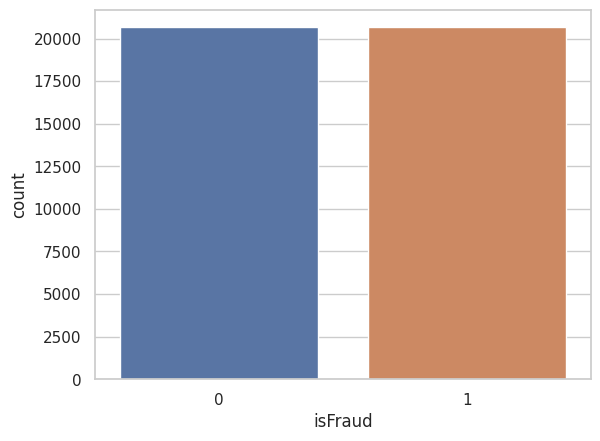

CPU times: user 1.14 s, sys: 247 ms, total: 1.39 s
Wall time: 1.15 s


In [19]:
%%time
df_majority = train_df[train_df['isFraud'] == 0]
df_minority = train_df[train_df['isFraud'] == 1]

size_minority = len(df_minority)

df_majority_downsampled = resample(df_majority,
                                   replace=False,  
                                   n_samples=size_minority,
                                   random_state=42)


df_downsampled = pd.concat([df_majority_downsampled, df_minority])

sns.countplot(x=df_downsampled["isFraud"]);
plt.show()



As shown above, due to the significant difference in numbers between the non-fraudulent and fraudulent samples, a random sampling of the non-fraudulent samples was used in order to ensure a balanced number of samples between the two samples, and the samples were not put back after each sampling to prevent duplication. Balancing the number of samples between the two categories helps improve the classification model's performance when dealing with unbalanced data.

##### Delete irrelevant data columns

In [20]:
df_downsampled1 = df_downsampled.drop(df_downsampled.columns[0], axis=1)


#### Feature Screening

In [21]:
%%time
X = df_downsampled1
y = df_downsampled['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=80)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)


AUC Score: 0.8157823191935816
CPU times: user 6.86 s, sys: 5.42 ms, total: 6.86 s
Wall time: 6.87 s


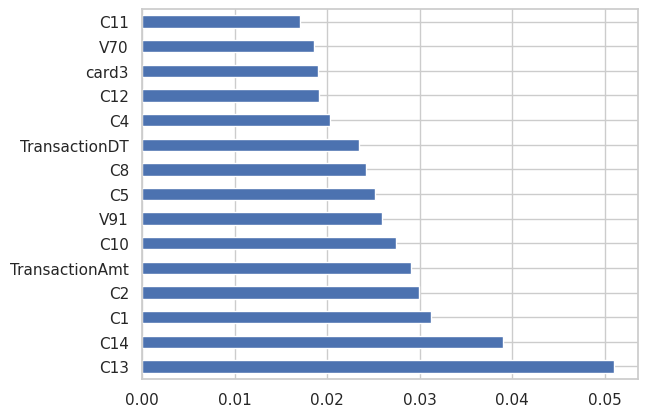

In [22]:
pd.Series(rf_classifier.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.show()

As the random forest model does not require normalization and normalization of the data, and thus the resulting AUC score indicates that the model has a good trade-off between TPR and FPR at different thresholds. Indicates that the model has good classification ability and can distinguish between positive and negative cases well. The displayed graphs illustrate the weight of the filtered features as a percentage. The higher the weight, the more influential the feature is.

#### Building the model

##### Random forest model 

In [23]:
rf_result = pd.DataFrame(columns=["TransactionID","isFraud"])
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)
predictions = rf_classifier.predict_proba(test_df)
rf_result['isFraud'] = predictions[:, 1]
rf_result['TransactionID'] = test_df.index.values

rf_result.to_csv('rf(result).csv', index=False)
print(rf_result.shape)
rf_result.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.202710
1,3663550,0.209137
2,3663551,0.352743
3,3663552,0.164177
4,3663553,0.341098


The private score of this random forest model is 0.885595, and the public score is 0.904909, which indicates that the value screened by this model is very close to the result of the competition and that the feature result screened by the random forest model is meaningful.

##### knn model

Based on the features selected by the random forest model, the two most influential features, "C13" and "C14," were selected to build the knn model. Due to the characteristics of the knn model, "C13" and "C14" were standardization and normalization in the training and test data.

In [24]:
%%time
df_train = pd.DataFrame(df_downsampled,columns=["C13"])
df_train["C14"] =df_downsampled['C14']
df_test = pd.DataFrame(test_df, columns=["C13"])
df_test["C14"] =test_df["C14"]

CPU times: user 4.98 ms, sys: 774 µs, total: 5.75 ms
Wall time: 4.57 ms


In [25]:
%%time
scaler = StandardScaler(with_std=False)
df_train["C13"] = scaler.fit_transform(df_train["C13"].values.reshape(-1, 1))
df_train["C14"] = scaler.fit_transform(df_train["C14"].values.reshape(-1, 1))
df_test['C13'] = scaler.fit_transform(test_df['C13'].values.reshape(-1, 1))
df_test['C14'] = scaler.fit_transform(test_df['C14'].values.reshape(-1, 1))

CPU times: user 47.4 ms, sys: 1.12 ms, total: 48.5 ms
Wall time: 47.5 ms


In [26]:
%%time

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized = (data - min_val) / (max_val - min_val)
    return normalized

df_train["C13"] = min_max_normalize(df_train["C13"])
df_train["C14"] = min_max_normalize(df_train["C14"])
df_test['C13'] = min_max_normalize(df_test["C13"])
df_test['C14'] = min_max_normalize(df_test["C14"])

CPU times: user 75.3 ms, sys: 1.6 ms, total: 76.9 ms
Wall time: 76.5 ms


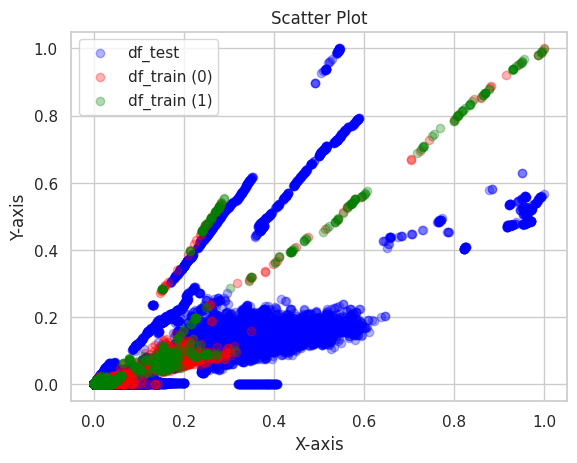

In [27]:
df_train = df_train.join(df_downsampled['isFraud'])
plt.scatter(df_test['C13'], df_test['C14'], c='blue', label='df_test', alpha=0.3)

plt.scatter(df_train.loc[df_train['isFraud'] == 0, 'C13'], df_train.loc[df_train['isFraud'] == 0, 'C14'], c='red', label='df_train (0)', alpha=0.3)
plt.scatter(df_train.loc[df_train['isFraud'] == 1, 'C13'], df_train.loc[df_train['isFraud'] == 1, 'C14'], c='green', label='df_train (1)', alpha=0.3)

plt.legend()

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

plt.show()

The plot illustrates the relationship between fraudulent transactions in the test data, the training data, and the non-fraudulent transactions, which gives a more intuitive understanding of the knn model.

In [28]:
%%time
X = np.vstack((df_train["C13"] ,df_train["C14"])).T
y = df_train['isFraud']

n_neighbors_values = list(range(1, 201,2))
results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    results.append({'n_neighbors': n_neighbors, 'MSE': mse})

results_df = pd.DataFrame(results)

matching_rows = results_df[results_df["MSE"] == results_df['MSE'].min() ]
matching_rows


CPU times: user 1min 17s, sys: 17.3 ms, total: 1min 17s
Wall time: 1min 17s


,n_neighbors,MSE
23,47,0.353617


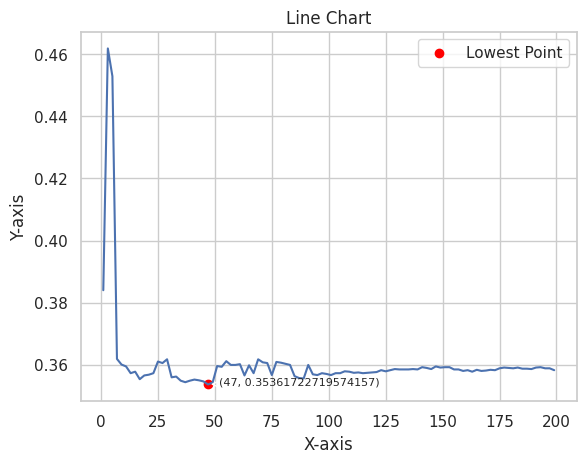

In [29]:
plt.plot(results_df['n_neighbors'], results_df['MSE'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Chart')

lowest_index = results_df['MSE'].idxmin()
lowest_value = results_df['MSE'].min()

plt.scatter(results_df['n_neighbors'][lowest_index], lowest_value, color='red', label='Lowest Point')
plt.annotate(f"({results_df['n_neighbors'][lowest_index]}, {lowest_value})", 
             xy=(results_df['n_neighbors'][lowest_index], lowest_value),
             xytext=(results_df['n_neighbors'][lowest_index]+5, lowest_value),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=8)

plt.legend()
plt.show()

The image plotted in the line graph illustrates the relationship between the different choices of n_neighbors values and the MSE values. n_neighbors values in the odd list from 1 to 200, with the lowest MSE value, are the optimal n_neighbors values for this knn model.

In [30]:
n_neighbors = matching_rows['n_neighbors'].values[0]
p_value=list(range(1,5))
p_results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for p in p_value:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors ,p = p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    p_results.append({'n_neighbors': n_neighbors,'p':p ,'MSE': mse})

p_results = pd.DataFrame(p_results) 
matching_rows1 = p_results[p_results["MSE"] == p_results['MSE'].min() ]

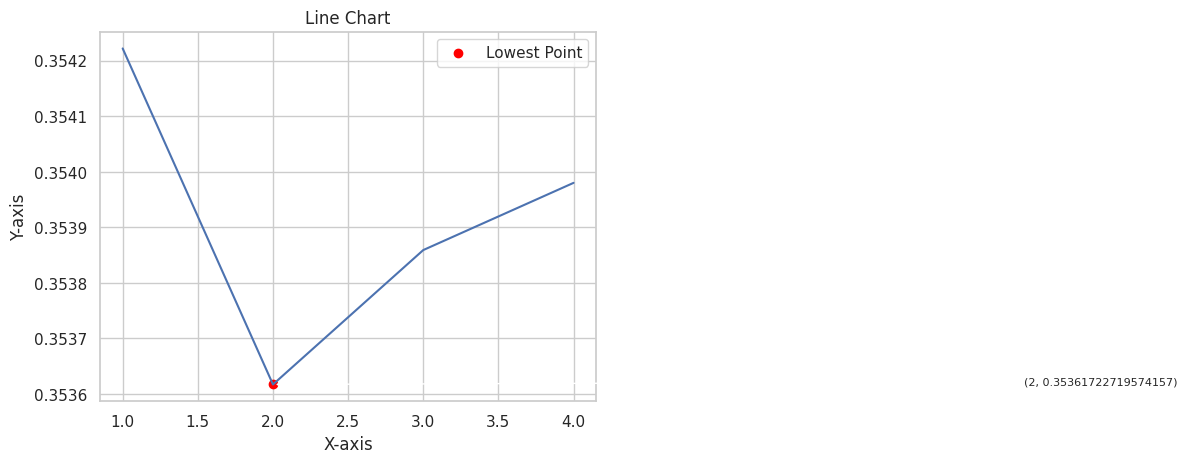

In [31]:
plt.plot(p_results['p'], p_results['MSE'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Chart')

lowest_index = p_results['MSE'].idxmin()
lowest_value = p_results['MSE'].min()

plt.scatter(p_results['p'][lowest_index], lowest_value, color='red', label='Lowest Point')
plt.annotate(f"({p_results['p'][lowest_index]}, {lowest_value})", 
             xy=(p_results['p'][lowest_index], lowest_value),
             xytext=(p_results['p'][lowest_index]+5, lowest_value),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=8)

plt.legend()
plt.show()

The line plot illustrates the relationship between different p values and the MSE value for a fixed value of n_neighbors. The value of p is the best distance algorithm for the knn model with the lowest MSE value on the list from 1 to 4.

In [32]:
%%time
p = matching_rows1['p'].values[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors = n_neighbors,p=p)
knn.fit(X_train, y_train)
A1 = np.column_stack((df_test['C13'], df_test['C14']))
X_test = np.array(A1)
y_pred = knn.predict(X_test)

CPU times: user 26.8 s, sys: 442 ms, total: 27.2 s
Wall time: 27.3 s


In [33]:
%%time
neighbors_labels = knn.predict_proba(X_test)
probabilities = knn.predict_proba(X_test)[:, 1]
result_df = pd.DataFrame({'isFraud': probabilities})
result_df['TransactionID'] = test_df.index.values
result_df = result_df.reindex(columns=['TransactionID', 'isFraud'])
result_df.to_csv('knn(result).csv', index=False)

CPU times: user 29.1 s, sys: 986 ms, total: 30.1 s
Wall time: 30.2 s


This knn model, which finally determines the p-value and n_neighbors values, has a Private Score of 0.695315 and a Public Score of 0.754563.

##### Naive Bayes classifier

Again, the data is standardized and normalized

In [34]:
%%time
All = df_downsampled.drop(['isFraud'], axis=1)
test = test_df

scaler = StandardScaler()
NB_test = pd.DataFrame(test, columns=test.columns)
NB_All = pd.DataFrame(All, columns=All.columns)

scaler = MinMaxScaler()
NB_test= scaler.fit_transform(NB_test)
NB_All = scaler.fit_transform(NB_All)

NB_All = pd.DataFrame(NB_All, columns = All.columns)
NB_test = pd.DataFrame(NB_test, columns = test.columns)

CPU times: user 1.92 s, sys: 572 ms, total: 2.49 s
Wall time: 2.49 s


In [35]:
X = NB_All[['C13','C14','C1']]
y = df_train['isFraud']
classifier = GaussianNB()
scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
for i, score in enumerate(scores):
    print(f"Cross-validation fold {i+1}: {score}")
print(f"Average accuracy: {scores.mean()}")

Cross-validation fold 1: 0.4929833051052504
Cross-validation fold 2: 0.48614640048396857
Cross-validation fold 3: 0.4846944948578342
Cross-validation fold 4: 0.5010284331518451
Cross-validation fold 5: 0.4957047791893527
Average accuracy: 0.49211148255765014


In [36]:
X = NB_All[['C13','C14','C1']]
y = df_train['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49697556254536657


In both cases, we used the train_test_split function to predict the labels in the test set and calculate the accuracy score and the cross_val_score function to perform k-fold cross-validation to calculate the average accuracy score, which is 0.49, indicating that we only predicted half of the values correctly.

In [37]:
X = NB_All[['C13','C14']]
y = df_train['isFraud']

classifier = GaussianNB()

cv_results = cross_validate(classifier, X, y, cv=5, scoring='accuracy', return_estimator=True)
best_model = cv_results['estimator'][cv_results['test_score'].argmax()]

X_test = NB_test[['C13','C14']]

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

NB_result = []
transaction_ids =  test_df.index.values
NB_result.append(['TransactionID', 'isFraud'])

for i in range(len(transaction_ids)):
    NB_result.append([transaction_ids[i], y_pred_proba[i][1]])

NB_result = pd.DataFrame(NB_result[1:], columns=NB_result[0])

NB_result.to_csv('NB(result1).csv', index=False)

Private Score: 0.467628 Public Score:0.513113

In [38]:
X = NB_All[['C1','C3']]
y = df_train['isFraud']

classifier = GaussianNB()

cv_results = cross_validate(classifier, X, y, cv=5, scoring='accuracy', return_estimator=True)
best_model = cv_results['estimator'][cv_results['test_score'].argmax()]


X_test = NB_test[['C1','C3']]

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

NB_result = []
transaction_ids =  test_df.index.values
NB_result.append(['TransactionID', 'isFraud'])

for i in range(len(transaction_ids)):
    NB_result.append([transaction_ids[i], y_pred_proba[i][1]])

NB_result = pd.DataFrame(NB_result[1:], columns=NB_result[0])

NB_result.to_csv('NB(result2).csv', index=False)

Private Score: 0.61167  Public Score:0.610187

In [39]:
X = NB_All[['C1','C4']]
y = df_train['isFraud']

classifier = GaussianNB()

cv_results = cross_validate(classifier, X, y, cv=5, scoring='accuracy', return_estimator=True)
best_model = cv_results['estimator'][cv_results['test_score'].argmax()]


X_test = NB_test[['C1','C4']]

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

NB_result = []
transaction_ids =  test_df.index.values
NB_result.append(['TransactionID', 'isFraud'])

for i in range(len(transaction_ids)):
    NB_result.append([transaction_ids[i], y_pred_proba[i][1]])

NB_result = pd.DataFrame(NB_result[1:], columns=NB_result[0])

NB_result.to_csv('NB(result3).csv', index=False)

Private Score: 0.674399  Public Score:0.708019

In [40]:
X = NB_All[['C13','C14','C1']]
y = df_train['isFraud']

classifier = GaussianNB()


cv_results = cross_validate(classifier, X, y, cv=5, scoring='accuracy', return_estimator=True)
best_model = cv_results['estimator'][cv_results['test_score'].argmax()]



X_test = NB_test[['C13','C14','C1']]


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

NB_result = []
transaction_ids =  test_df.index.values
NB_result.append(['TransactionID', 'isFraud'])

for i in range(len(transaction_ids)):
    NB_result.append([transaction_ids[i], y_pred_proba[i][1]])

NB_result = pd.DataFrame(NB_result[1:], columns=NB_result[0])

NB_result.to_csv('NB(result4).csv', index=False)

Private Score: 0.691338  Public Score:0.728277

The final scores obtained from the above four groups of Naive Bayes models with different feature ranges can show that the level of feature influence and the association between features will affect the processing of the Naive Bayes model, and the independent feature relationship and the appropriate amount of features can make the naive Bayes model play the best effect.

##### (Bonus MARKS)  Cluster analysis

In the cluster analysis, the K-means clustering algorithm is used to cluster the data set, and the Sum of Squared Errors and silhouette score of the clustering results are calculated to evaluate the K-means clustering algorithm model. Additional features from the K-means clustering algorithm are proposed into the training set for training and compared and analyzed by different models (knn and Naive Bayes classifier).

1.Use all the features in the training set

In [41]:
data =NB_All

kmeans = KMeans(n_clusters=2, n_init=10)

kmeans.fit(data)
sse = kmeans.inertia_
score = silhouette_score(data, kmeans.labels_)

features = kmeans.transform(data)
labels = kmeans.labels_

print(sse)
print(score)

43322.106352474664
0.3431704487291746


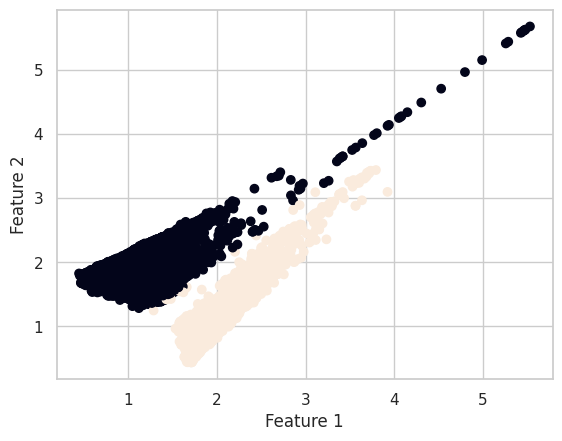

In [42]:
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [43]:
data = NB_All
labels = df_train['isFraud']
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
features = kmeans.transform(data)
test = NB_test
test_features = kmeans.transform(test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=p)
knn.fit(features, labels)
probabilities = knn.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)

df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('knn(KM_result1).csv', index=False)

Private Score: 0.668166  Public Score:0.7574

In [45]:
nb = GaussianNB()
nb.fit(features, labels)
probabilities = nb.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)


df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('NB(KM_result1).csv', index=False)

Private Score: 0.678011  Public Score:0.708423

2.Use two main features in the training set

61.16817901754219
0.9790653149379916


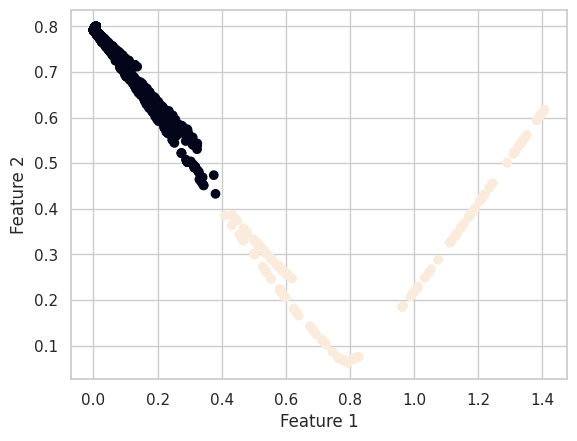

In [46]:
data =NB_All[['C13','C14']]
kmeans = KMeans(n_clusters=2, n_init=10)

kmeans.fit(data)
sse = kmeans.inertia_
score = silhouette_score(data, kmeans.labels_)

features = kmeans.transform(data)
labels = kmeans.labels_

print(sse)
print(score)

plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [48]:
data = NB_All[['C13','C14']]
labels = df_train['isFraud']
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
features = kmeans.transform(data)
test = NB_test[['C13','C14']]
test_features = kmeans.transform(test)

knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=p)
knn.fit(features, labels)
probabilities = knn.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)


df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('knn(KM_result2).csv', index=False)



Private Score: 0.412162  Public Score:0.425858

In [49]:
nb = GaussianNB()
nb.fit(features, labels)
probabilities = nb.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)


df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('NB(KM_result2).csv', index=False)

Private Score: 0.584626  Public Score:0.618445

3.Use the main multiple features in the training set

440.56682699726156
0.7844397751683811


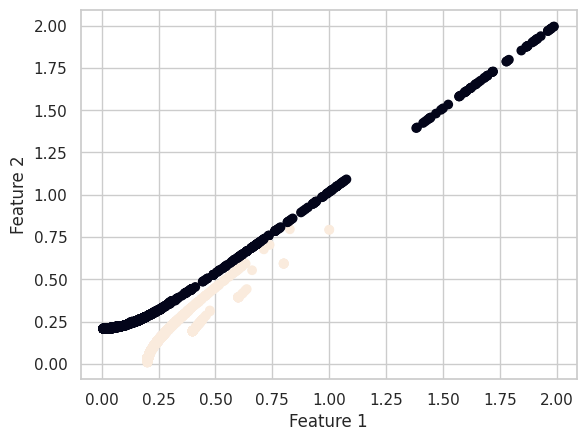

In [51]:
data =NB_All[['C13','C14','C1','C8','TransactionAmt','V90']]
kmeans = KMeans(n_clusters=2, n_init=10)

kmeans.fit(data)
sse = kmeans.inertia_
score = silhouette_score(data, kmeans.labels_)

features = kmeans.transform(data)
labels = kmeans.labels_

print(sse)
print(score)

plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [52]:
data = NB_All[['C13','C14','C1','C8','TransactionAmt','V90']]
labels = df_train['isFraud']
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
features = kmeans.transform(data)
test = NB_test[['C13','C14','C1','C8','TransactionAmt','V90']]
test_features = kmeans.transform(test)

knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=p)
knn.fit(features, labels)
probabilities = knn.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)


df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('knn(KM_result3).csv', index=False)

Private Score: 0.653888  Public Score:0.687996

In [53]:
nb = GaussianNB()
nb.fit(features, labels)
probabilities = nb.predict_proba(test_features)
results = []
for i, prob in enumerate(probabilities):
    result = [None, prob[1]]
    results.append(result)


df = pd.DataFrame(results, columns=['TransactionID', 'isFraud'])
df['TransactionID']=test_df.index.values

df.to_csv('NB(KM_result3).csv', index=False)

Private Score: 0.596434  Public Score:0.611974

In summary, for the features extracted after clustering analysis and used in other models, the features extracted by clustering analysis have the highest scores when using all the features in the training data. In contrast, the two most essential features selected by the random forest model have the worst scores when used in other models. It shows that the clustering analysis should select the appropriate number of features to achieve the expected results and improve the accuracy. Too few features for clustering analysis will get the opposite results.

# Conclusion
In this experiment, four large datasets  for data processing (dataset analysis, merging), data cleaning (missing values processing, sample balancing, label coding, redundancy reduction), feature selection (random forest model), and model building (knn model, Naive Bayes model, classifier model, random forest model, and K-means model )in clustering analysis, which leads to the following conclusions:

1. Since the knn and NB models could not give satisfactory results, the random forest model was used to get higher scores. 

2. When dealing with the knn model, the value of n_neighbors and the impact of different distance metrics need to be considered, and there are two main features to choose from.

3. When dealing with the NB model, the relationship between the features should be considered. The features with significant correlation between the two are classified independently, significantly affecting the model's accuracy. 

4. When using cluster analysis, it is necessary to select the essential features, and the number of features is appropriate to obtain more accurate results. Otherwise, it will cause too much deviation or too long operation time.


![avatar](/Users/billjoker/Desktop/理解数据/作业/task3/1.png)

![avatar](/Users/billjoker/Desktop/理解数据/作业/task3/2.png)

![avatar](/Users/billjoker/Desktop/理解数据/作业/task3/3.png)

![avatar](/Users/billjoker/Desktop/理解数据/作业/task3/7.png)

# Bibliograph
1. McKinney, W. (2022). Python for data analysis : data wrangling with pandas, numPy, and Jupyter (Third edition). O’Reilly Media, Inc.
2. Gupta, D (2020). Intelligent data analysis : from data gathering to data comprehension. Wiley. 
3. Gujarati, D. N. (2019). Linear regression : a mathematical introduction. SAGE Publications, Inc.
4. Lučanin, D. (2018). Jupyter Notebook for data science. PACKT Publishing.

